### Comments

Participant 2 Lisa
- Maybe say that it's going to be 3 trials of squeezing as hard as possible?
- Check if rewards are really sampled from a uniform and not a normal distribution

Participant 3 Simone
- When the mouse is already in the button, it doesn’t react on the click anymore (needs to be moved out and in again)
- <span style="color: purple;">People seem more sensitive to the total effort than the amount of effort relative to the points</span>
- <span style="color: purple;">Accept/reject also depends on history - if you just did a really hard one, then you are less likely to accept another hard one</span>
- <span style="color: purple;">Consider bigger step sizes? Restrict reward offer if we get to lower k's? Although then we get the problem that Lilian noted that you just get used to the rewards you get</span>
- <span style="color: purple;">Make a leaderboard for grip strength</span>

Participant 4 Tim
- Make the y-axis longer (men are too strong)
- <span style="color: purple;">Muscles get tired after a few trials</span>
- Make it clear that rejected trials give 0 points and there is a set number of trials (i.e., you won't just get an easier offer if you rejected one)
- Consider if the break time should be fixed - if you take a long break your muscles won't be as tired and you're more likely to accept high effort offers
- <span style="color: purple;">Make the punishment higher - else the risk is super low (like if you reject, it's 0 and if you don’t manage it's only -1 so you might as well try)</span>
- <span style="color: purple;">Threshold is more on effort - if it's below some level then you always accept even if the offered points are low</span>
- Strategic thinking - if I reject a 90% now, then I will be able to do the next three 80%'s

Participant 5 Johannes
- Don't allow people to help with their second hand
- <span style="color: purple;">Why would you reject a trial? Maybe make explicit that it saves you time OR make it such that you get a different offer if you reject?</span>

Participant 6 Sankalp
- Make sure people use separate hands for the gripper and mouse (Sankalp kept changing hands between mouse and gripper)
  Note down which hand they used for calibration


### Import libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

%matplotlib inline

### Load data

In [10]:
# Path to the directory containing your CSV files
directory_path = '/Users/majafriedemann/Documents/GitHub/pgACC-TUS/experiment_code/staircase_data'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(directory_path + '/*.csv')

# List to hold DataFrames
dfs = []

# Iterate through the list of files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,expName,curec_ID,session_nr,date,end_date,participant,age,gender,gripper_baseline,max_effort_calibration_1,...,total_reward,effort_offer,next_effort_offer,effort_expended,effort_trace,estimated_k,estimated_net_value,participant_response,participant_choice_response_time,participant_effort_response_time
0,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,0,6,NaN,NaN,"[0.32623291015625, 0.40252685546875, 0.5105590...",0.500000,0.000000,NaN,NaN,NaN
1,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,18,6,7.0,7.022331,"[0.0091552734375, 0.0079345703125, 0.007934570...",0.500000,0.000000,accepted,4.344511,2.241329
2,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,41,7,7.0,8.425190,"[0.025634765625, 0.02532958984375, 0.026245117...",0.406800,-1.500000,accepted,3.187663,1.851403
3,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,62,7,8.0,7.905315,"[0.00335693359375, 0.00335693359375, 0.0048828...",0.406800,1.066812,accepted,2.561404,1.813483
4,pgACC-TUS-staircase,NaN,1,2024-02-13_11h43.05.255,NaN,2,NaN,NaN,-0.066528,2.446027,...,87,8,8.0,8.888790,"[-0.0067138671875, -0.0067138671875, -0.006713...",0.329715,-1.035185,accepted,2.614264,1.787795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,4,9.0,4.335848,"[0.07476806640625, 0.07476806640625, 0.0747680...",0.206174,1.701219,accepted,1.267249,1.675672
278,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,9,10.0,0.000000,[],0.206174,-1.700080,rejected,1.451322,0.000000
279,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,10,9.0,0.000000,[],0.245133,6.382617,rejected,1.301922,0.000000
280,pgACC-TUS-staircase,NaN,1,2024-02-13_11h53.12.763,NaN,3,NaN,NaN,-0.072327,4.859837,...,316,9,4.0,0.000000,[],0.283881,0.144197,rejected,1.692577,0.000000


In [11]:
variables = combined_df.columns
variables

Index(['expName', 'curec_ID', 'session_nr', 'date', 'end_date', 'participant',
       'age', 'gender', 'gripper_baseline', 'max_effort_calibration_1',
       'max_effort_calibration_2', 'max_effort_calibration_3', 'max_effort',
       'max_effort_baseline_corrected', 'trial_count', 'reward_offer',
       'next_reward_offer', 'reward_earned', 'total_reward', 'effort_offer',
       'next_effort_offer', 'effort_expended', 'effort_trace', 'estimated_k',
       'estimated_net_value', 'participant_response',
       'participant_choice_response_time', 'participant_effort_response_time'],
      dtype='object')

Participant 2, Final Estimated k: 0.35


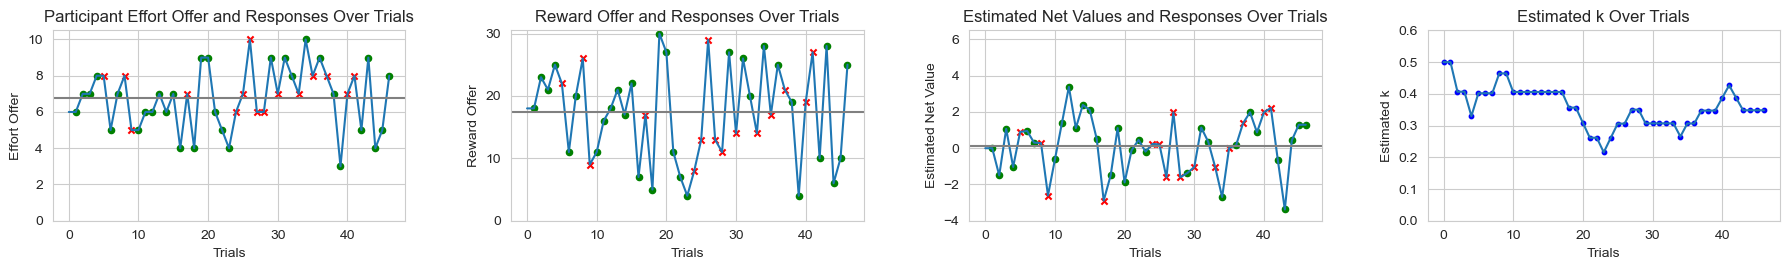

Participant 6, Final Estimated k: 0.28


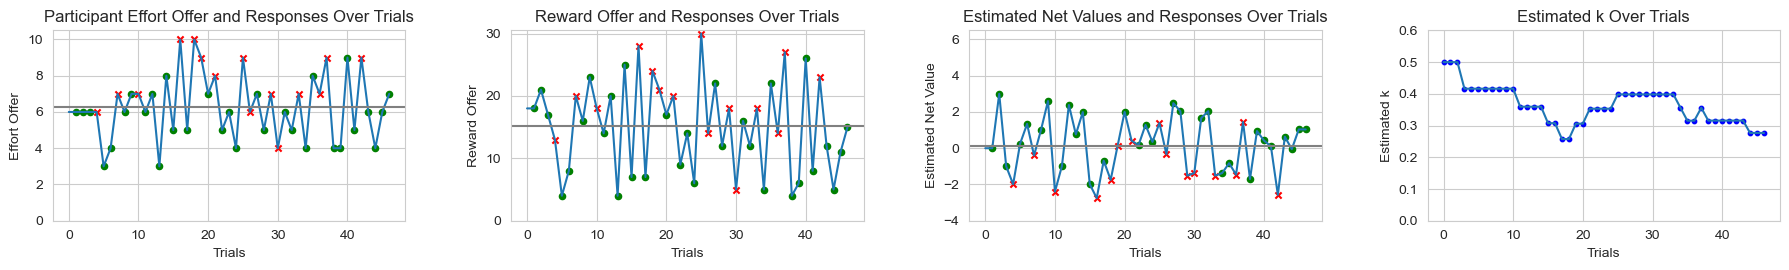

Participant 4, Final Estimated k: 0.31


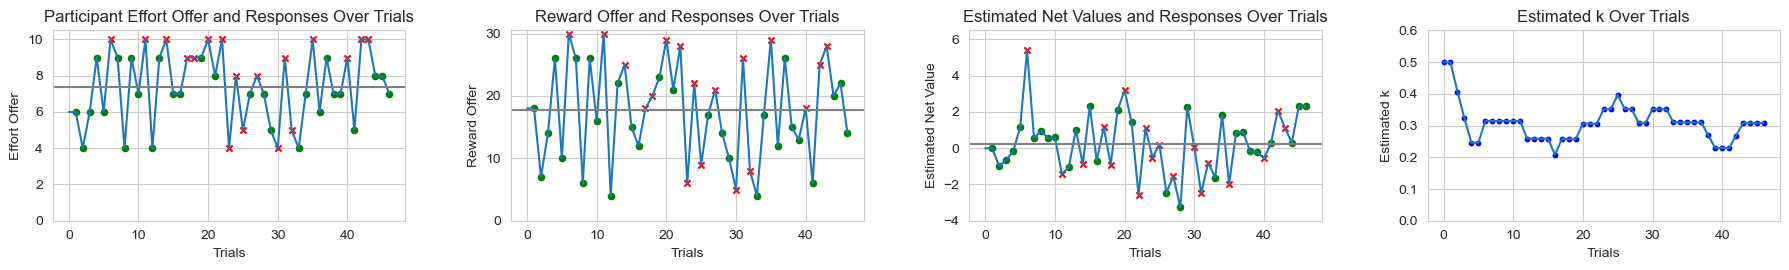

Participant 5, Final Estimated k: 0.31


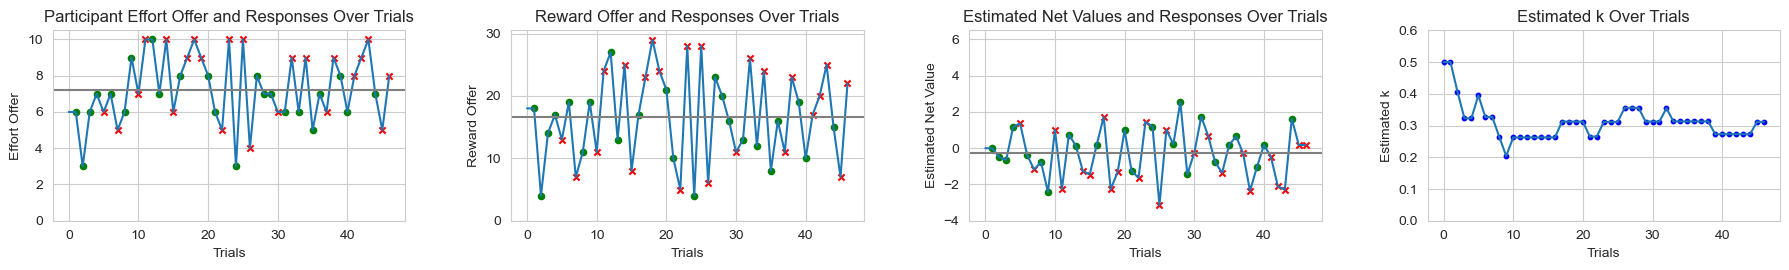

Participant 3, Final Estimated k: 0.28


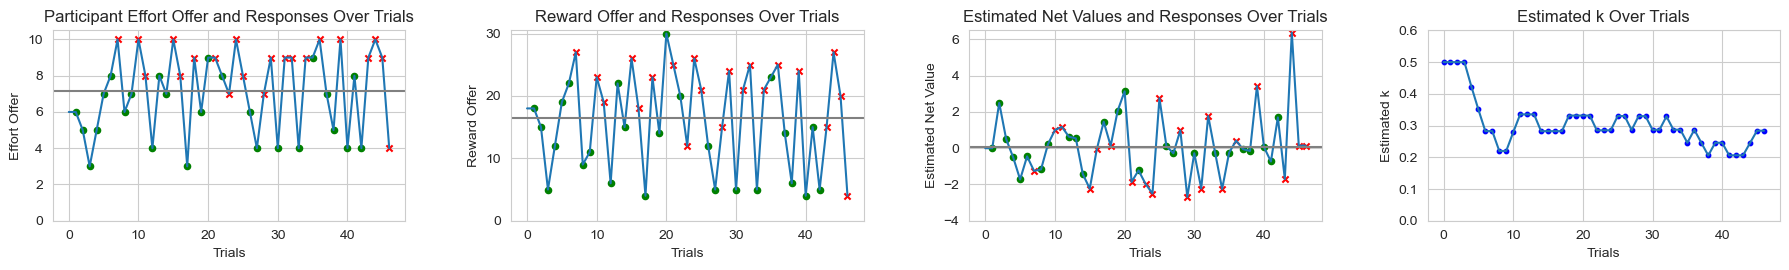

In [68]:
participants = combined_df['participant'].unique()

for participant in participants:
    # Skip Participant 1
    if participant == 1:
        continue

    participant_data = combined_df[combined_df['participant'] == participant]
    
    # Extracting data for plotting
    estimated_net_values = participant_data['estimated_net_value'].values
    responses = participant_data['participant_response'].values
    estimated_ks = participant_data['estimated_k'].values
    effort_offers = participant_data['effort_offer'].values
    reward_offers = participant_data['reward_offer'].values
    reward_minus_effort = reward_offers - effort_offers  

    # Get the final estimated_k value for the participant
    final_estimated_k = estimated_ks[-1] if len(estimated_ks) > 0 else 'N/A'
    print(f'Participant {participant}, Final Estimated k: {final_estimated_k:.2f}')


    plt.figure(figsize=(18, 2.8))  

    # Plot for effort offers and responses over trials
    plt.subplot(1, 4, 1)
    plt.plot(effort_offers, label='Effort Offer')
    plt.scatter(np.arange(len(responses)), [effort_offers[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    plt.scatter(np.arange(len(responses)), [effort_offers[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    plt.axhline(y=np.mean(effort_offers), color='grey', linestyle='-')
    plt.ylim([0, 10.5])
    plt.xlabel('Trials')
    plt.ylabel('Effort Offer')
    plt.title(f'Participant Effort Offer and Responses Over Trials')

    # Plot for reward offers and responses over trials
    plt.subplot(1, 4, 2)
    plt.plot(reward_offers, label='Reward Offer')
    plt.scatter(np.arange(len(responses)), [reward_offers[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    plt.scatter(np.arange(len(responses)), [reward_offers[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    plt.axhline(y=np.mean(reward_offers), color='grey', linestyle='-')
    plt.ylim([0, 30.5])
    plt.xlabel('Trials')
    plt.ylabel('Reward Offer')
    plt.title(f'Reward Offer and Responses Over Trials')

    # # Plot for "Reward minus Effort" over trials
    # plt.subplot(1, 5, 3)
    # plt.plot(reward_minus_effort, label='Reward minus Effort')
    # plt.scatter(np.arange(len(responses)), [reward_minus_effort[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    # plt.scatter(np.arange(len(responses)), [reward_minus_effort[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    # plt.axhline(y=np.mean(reward_minus_effort), color='grey', linestyle='-')
    # plt.ylim([-0.5, 22])
    # plt.xlabel('Trials')
    # plt.ylabel('Reward minus Effort')
    # plt.title(f'Reward minus Effort Over Trials')

    # Plot for estimated net values and responses over trials
    plt.subplot(1, 4, 3)
    plt.plot(estimated_net_values, label='Estimated Net Values')
    plt.scatter(np.arange(len(responses)), [estimated_net_values[i] if res == 'accepted' else None for i, res in enumerate(responses)], color='green', marker='o', label='Accept', s=20)
    plt.scatter(np.arange(len(responses)), [estimated_net_values[i] if res == 'rejected' else None for i, res in enumerate(responses)], color='red', marker='x', label='Reject', s=20)
    plt.axhline(y=np.mean(estimated_net_values), color='grey', linestyle='-')
    plt.ylim([-4, 6.5])
    plt.xlabel('Trials')
    plt.ylabel('Estimated Net Value')
    plt.title(f'Estimated Net Values and Responses Over Trials')

    # Plot for estimated k over trials with blue points for all responses
    plt.subplot(1, 4, 4)
    plt.plot(estimated_ks, label='Estimated k')
    plt.scatter(np.arange(len(responses)), estimated_ks, color='blue', marker='o', s=10)  
    plt.ylim([0, 0.6])
    plt.xlabel('Trials')
    plt.ylabel('Estimated k')
    plt.title(f'Estimated k Over Trials')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3) 
    plt.show()


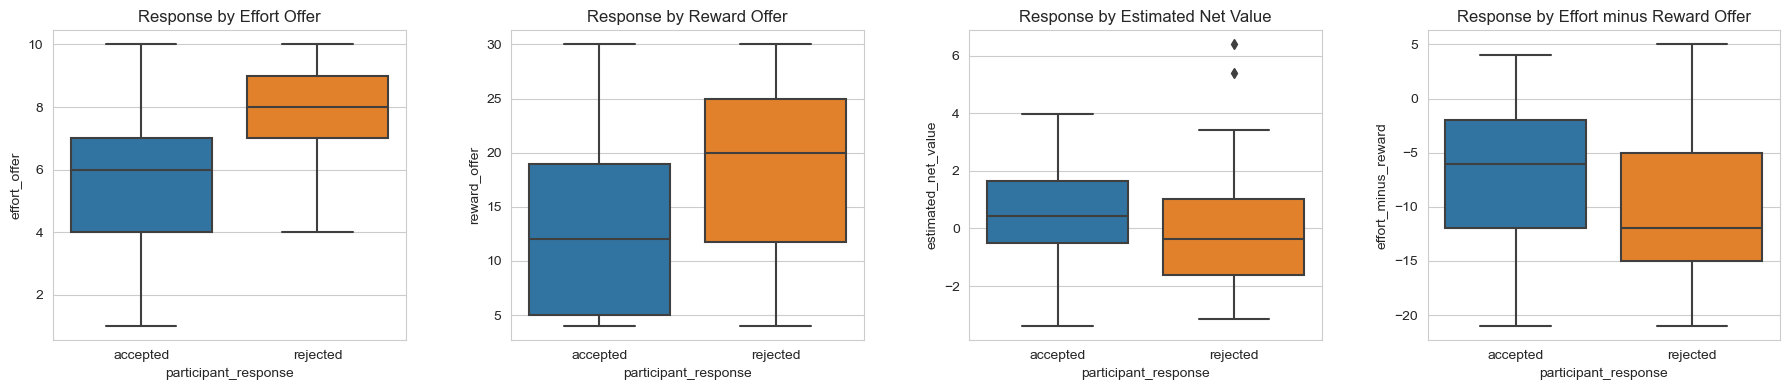

In [65]:
# Calculate "Effort Offer minus Reward Offer" and add it as a new column
combined_df['effort_minus_reward'] = combined_df['effort_offer'] - combined_df['reward_offer']

# Set up a matplotlib figure with 4 subplots, arranged horizontally
fig, axes = plt.subplots(1, 4, figsize=(18, 4)) 

# Plot for Effort Offer
sns.boxplot(x="participant_response", y="effort_offer", data=combined_df, ax=axes[0])
axes[0].set_title('Response by Effort Offer')

# Plot for Reward Offer
sns.boxplot(x="participant_response", y="reward_offer", data=combined_df, ax=axes[1])
axes[1].set_title('Response by Reward Offer')

# Plot for Estimated Net Value
sns.boxplot(x="participant_response", y="estimated_net_value", data=combined_df, ax=axes[2])
axes[2].set_title('Response by Estimated Net Value')

# Plot for Effort Offer minus Reward Offer
sns.boxplot(x="participant_response", y="effort_minus_reward", data=combined_df, ax=axes[3])
axes[3].set_title('Response by Effort minus Reward Offer')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3) 
plt.show()
